In [21]:
import torch, torchvision
from torchvision import transforms
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import pandas as pd
import torch.utils.data as data
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('train_data.csv')
display(data)

,SalePrice,YearBuilt,Size(sqf),Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot(Ground),N_Parkinglot(Basement),TimeToBusStop,TimeToSubway,N_manager,N_elevators,SubwayStation,N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total)
0,141592,2006,814,3,terraced,individual_heating,management_in_trust,111.0,184.0,5min~10min,10min~15min,3.0,0.0,Kyungbuk_uni_hospital,5,6.0,9.0
1,51327,1985,587,8,corridor,individual_heating,self_management,80.0,76.0,0~5min,5min~10min,2.0,2.0,Daegu,3,12.0,4.0
2,48672,1985,587,6,corridor,individual_heating,self_management,80.0,76.0,0~5min,5min~10min,2.0,2.0,Daegu,3,12.0,4.0
3,380530,2006,2056,8,terraced,individual_heating,management_in_trust,249.0,536.0,0~5min,0-5min,5.0,11.0,Sin-nam,5,3.0,7.0
4,78318,1992,644,2,mixed,individual_heating,self_management,142.0,79.0,5min~10min,15min~20min,4.0,8.0,Myung-duk,3,9.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4119,570796,2007,1928,24,terraced,individual_heating,management_in_trust,0.0,1270.0,0~5min,0-5min,14.0,16.0,Kyungbuk_uni_hospital,10,9.0,10.0
4120,307079,2015,644,22,terraced,individual_heating,management_in_trust,102.0,400.0,0~5min,5min~10min,5.0,10.0,Daegu,7,7.0,11.0
4121,357522,2007,868,20,terraced,individual_heating,management_in_trust,0.0,1270.0,0~5min,0-5min,14.0,16.0,Kyungbuk_uni_hospital,10,9.0,10.0
4122,312389,1978,1327,1,corridor,individual_heating,self_management,87.0,0.0,0~5min,0-5min,1.0,4.0,Kyungbuk_uni_hospital,3,7.0,11.0


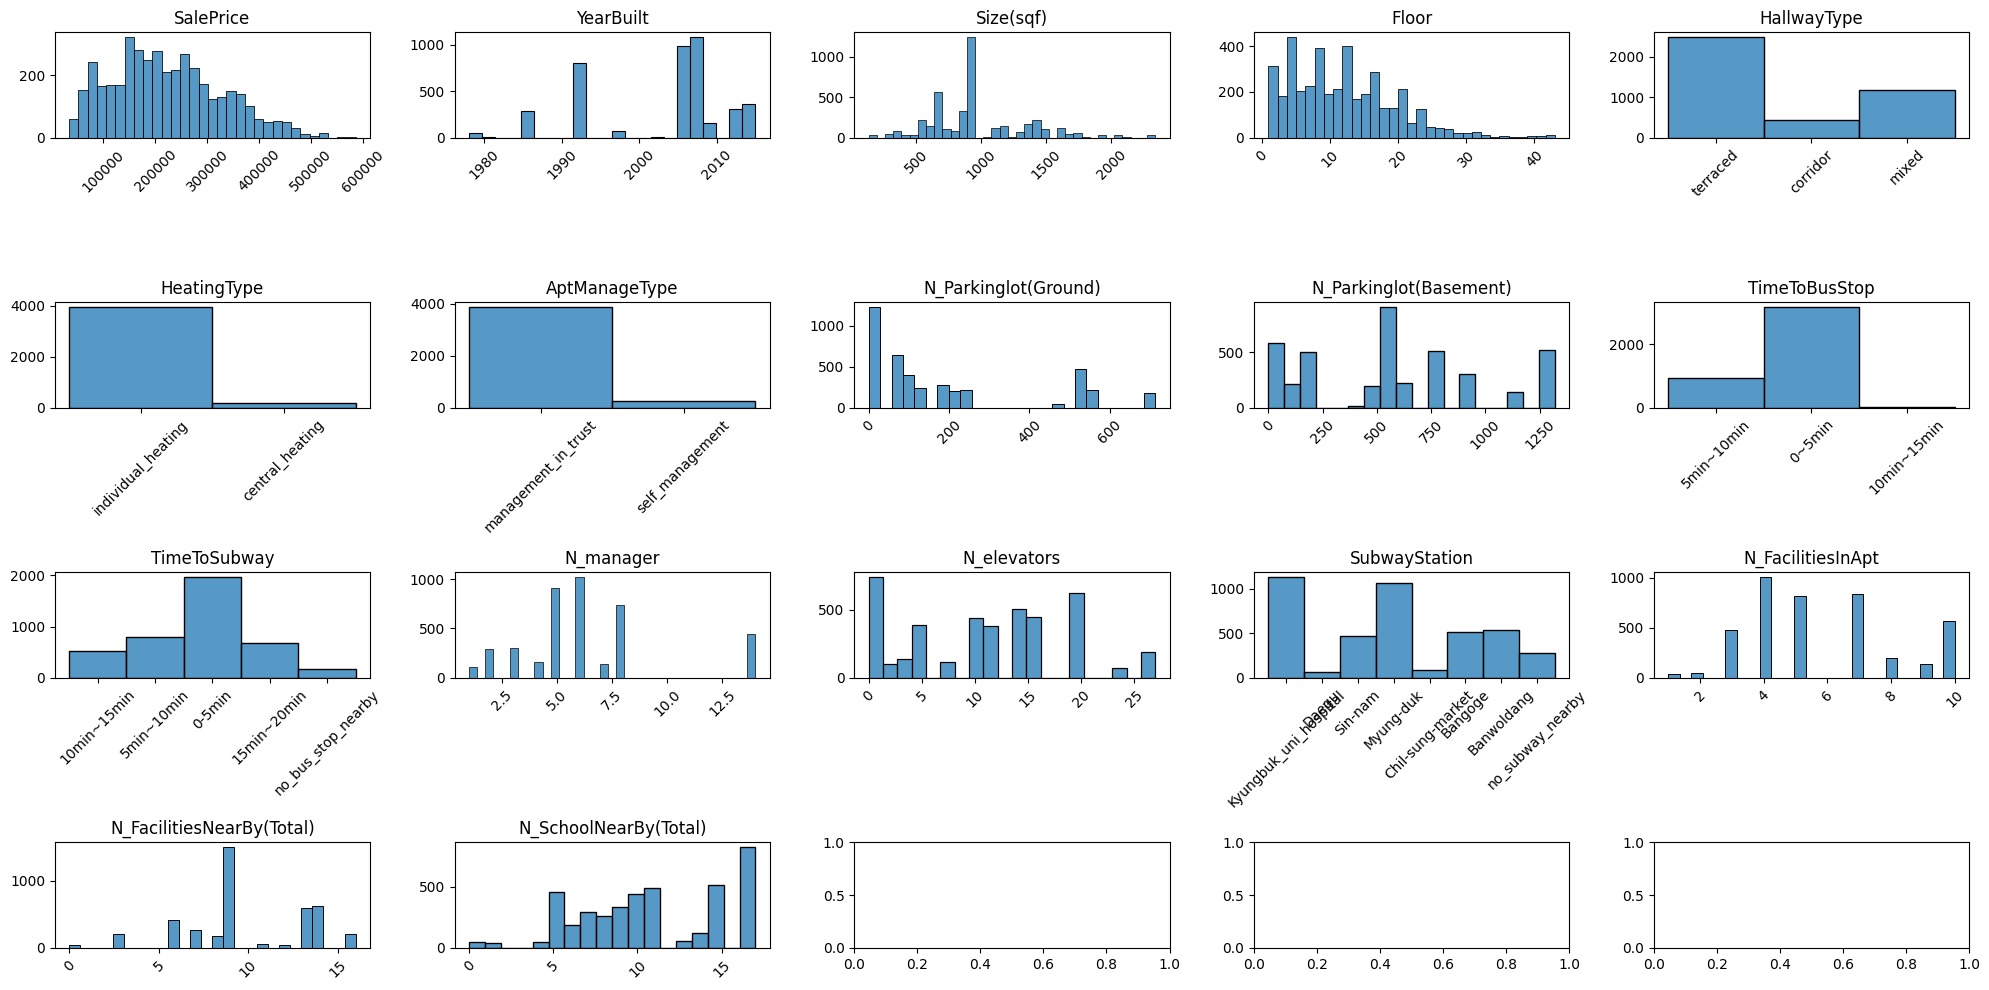

In [3]:
fig, ax = plt.subplots(4, 5, figsize=(20, 10))
for i in range(4):
    for j in range(5):
        if i*5+j > 16:
            break
        sns.histplot(data.iloc[:, i*5+j], ax=ax[i, j])
        ax[i, j].set_title(data.columns[i*5+j])
        ax[i, j].set_xlabel('')
        ax[i, j].set_ylabel('')
        for tick in ax[i, j].get_xticklabels():
            tick.set_rotation(45)
plt.tight_layout()
plt.show()

# Bazowe podejście

## Przetwarzanie danych

In [5]:
from data_functions import get_dummies, output_to_labels

In [6]:
data = output_to_labels(data, "SalePrice")
display(data)

,YearBuilt,Size(sqf),Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot(Ground),N_Parkinglot(Basement),TimeToBusStop,TimeToSubway,N_manager,N_elevators,SubwayStation,N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total),SalePrice
0,2006,814,3,terraced,individual_heating,management_in_trust,111.0,184.0,5min~10min,10min~15min,3.0,0.0,Kyungbuk_uni_hospital,5,6.0,9.0,1
1,1985,587,8,corridor,individual_heating,self_management,80.0,76.0,0~5min,5min~10min,2.0,2.0,Daegu,3,12.0,4.0,0
2,1985,587,6,corridor,individual_heating,self_management,80.0,76.0,0~5min,5min~10min,2.0,2.0,Daegu,3,12.0,4.0,0
3,2006,2056,8,terraced,individual_heating,management_in_trust,249.0,536.0,0~5min,0-5min,5.0,11.0,Sin-nam,5,3.0,7.0,2
4,1992,644,2,mixed,individual_heating,self_management,142.0,79.0,5min~10min,15min~20min,4.0,8.0,Myung-duk,3,9.0,14.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4119,2007,1928,24,terraced,individual_heating,management_in_trust,0.0,1270.0,0~5min,0-5min,14.0,16.0,Kyungbuk_uni_hospital,10,9.0,10.0,2
4120,2015,644,22,terraced,individual_heating,management_in_trust,102.0,400.0,0~5min,5min~10min,5.0,10.0,Daegu,7,7.0,11.0,1
4121,2007,868,20,terraced,individual_heating,management_in_trust,0.0,1270.0,0~5min,0-5min,14.0,16.0,Kyungbuk_uni_hospital,10,9.0,10.0,2
4122,1978,1327,1,corridor,individual_heating,self_management,87.0,0.0,0~5min,0-5min,1.0,4.0,Kyungbuk_uni_hospital,3,7.0,11.0,1


In [7]:
categories = data.select_dtypes(include="object").columns
print(categories)
data = get_dummies(data, categories)

display(data)

Index(['HallwayType', 'HeatingType', 'AptManageType', 'TimeToBusStop',
       'TimeToSubway', 'SubwayStation'],
      dtype='object')


,YearBuilt,Size(sqf),Floor,N_Parkinglot(Ground),N_Parkinglot(Basement),N_manager,N_elevators,N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total),...,TimeToSubway_5min~10min,TimeToSubway_no_bus_stop_nearby,SubwayStation_Bangoge,SubwayStation_Banwoldang,SubwayStation_Chil-sung-market,SubwayStation_Daegu,SubwayStation_Kyungbuk_uni_hospital,SubwayStation_Myung-duk,SubwayStation_Sin-nam,SubwayStation_no_subway_nearby
0,2006,814,3,111.0,184.0,3.0,0.0,5,6.0,9.0,...,False,False,False,False,False,False,True,False,False,False
1,1985,587,8,80.0,76.0,2.0,2.0,3,12.0,4.0,...,True,False,False,False,False,True,False,False,False,False
2,1985,587,6,80.0,76.0,2.0,2.0,3,12.0,4.0,...,True,False,False,False,False,True,False,False,False,False
3,2006,2056,8,249.0,536.0,5.0,11.0,5,3.0,7.0,...,False,False,False,False,False,False,False,False,True,False
4,1992,644,2,142.0,79.0,4.0,8.0,3,9.0,14.0,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4119,2007,1928,24,0.0,1270.0,14.0,16.0,10,9.0,10.0,...,False,False,False,False,False,False,True,False,False,False
4120,2015,644,22,102.0,400.0,5.0,10.0,7,7.0,11.0,...,True,False,False,False,False,True,False,False,False,False
4121,2007,868,20,0.0,1270.0,14.0,16.0,10,9.0,10.0,...,False,False,False,False,False,False,True,False,False,False
4122,1978,1327,1,87.0,0.0,1.0,4.0,3,7.0,11.0,...,False,False,False,False,False,False,True,False,False,False


## Trenowanie modelu

In [18]:
from data_functions import train_valid_split
from helper_functions import train_model, get_mse
from models import Net

In [19]:
train, valid = train_valid_split(data, target="SalePrice")
display(train.tensors[0].shape, valid.tensors[0].shape)

torch.Size([3299, 33])

torch.Size([825, 33])

In [19]:
net = Net(train.tensors[0].shape[1], 100, 1)
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [20]:
train_m = False
if train_m:
    iters_list, loss_list, train_eval_list, valid_eval_list = train_model(net, train, valid, criterion, optimizer, get_mse)
else:
    state_dict = torch.load("starting_model.tar")
    net.load_state_dict(state_dict)

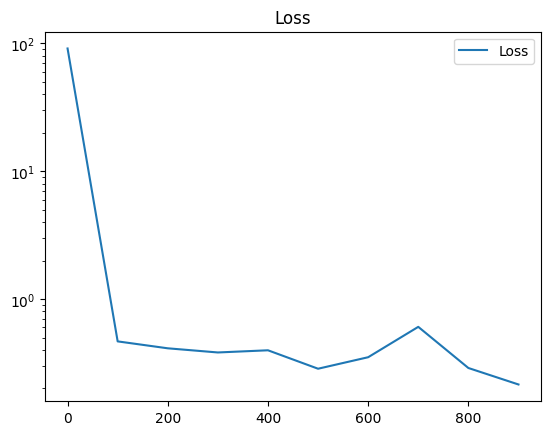

In [11]:
loss = sns.lineplot(x=iters_list, y=loss_list, label="Loss")
loss.set_title("Loss")
loss.set(yscale="log")
plt.show()

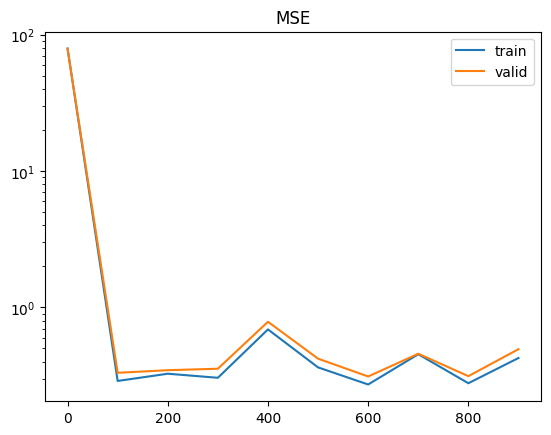

In [12]:
eval = sns.lineplot(x=iters_list, y=train_eval_list, label="train")
eval = sns.lineplot(x=iters_list, y=valid_eval_list, label="valid")
eval.set_title("MSE")
eval.set(yscale="log")
plt.show()

## Ewaluacja modelu

In [21]:
from helper_functions import get_accuracy

final_acc = get_accuracy(net, valid)
final_mse = get_mse(net, valid)
print(final_acc)
print(final_mse)

0.6909090909090909
0.40485697984695435


In [14]:
torch.save(net.state_dict(), "starting_model.tar")

- Model słabo sobie radzi z ostatnią klasą
- Trzeba bardziej rozbudować model

# Poprawianie struktury modelu

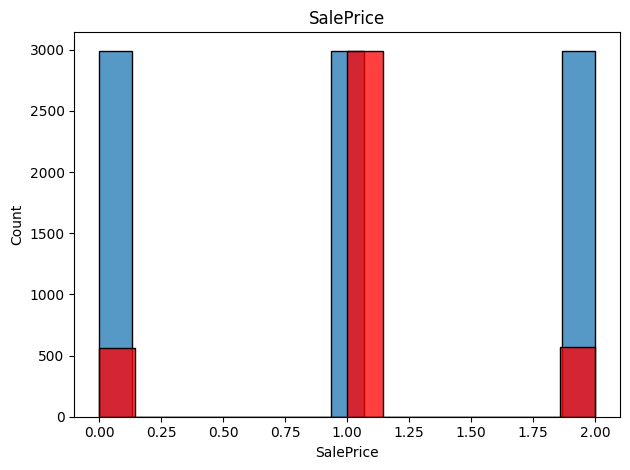

In [15]:
from data_functions import equalize_classes

data_eq = equalize_classes(data, "SalePrice")

fig, ax = plt.subplots()
sns.histplot(data_eq["SalePrice"], ax=ax)
sns.histplot(data["SalePrice"], ax=ax, color="red")
ax.set_title("SalePrice")
plt.tight_layout()
plt.show()

In [22]:
train_eq, valid_eq = train_valid_split(data_eq, target="SalePrice")

train_norm = F.normalize(train_eq.tensors[0], dim=0)
valid_norm = F.normalize(valid_eq.tensors[0], dim=0)
display(train_norm, valid_norm)

tensor([[0.0118, 0.0181, 0.0110,  ..., 0.0000, 0.0000, 0.0000],
        [0.0118, 0.0186, 0.0197,  ..., 0.0000, 0.0000, 0.0000],
        [0.0117, 0.0071, 0.0102,  ..., 0.0231, 0.0000, 0.0000],
        ...,
        [0.0117, 0.0039, 0.0063,  ..., 0.0231, 0.0000, 0.0000],
        [0.0117, 0.0056, 0.0039,  ..., 0.0000, 0.0365, 0.0000],
        [0.0117, 0.0194, 0.0134,  ..., 0.0231, 0.0000, 0.0000]])

tensor([[0.0234, 0.0130, 0.0093,  ..., 0.0000, 0.0000, 0.0000],
        [0.0235, 0.0142, 0.0156,  ..., 0.0463, 0.0000, 0.0000],
        [0.0237, 0.0192, 0.0047,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0237, 0.0336, 0.0109,  ..., 0.0000, 0.0000, 0.0000],
        [0.0237, 0.0363, 0.0467,  ..., 0.0000, 0.0000, 0.0000],
        [0.0236, 0.0254, 0.0233,  ..., 0.0000, 0.0760, 0.0000]])